# Evaluation der Güte von Email-Extraktion aus OA-Volltexten

1 Fragestellung:

Aus Volltexten, die Open Access zur Verfügung stehen, wurde beim Text- und Data-Mining jeweils die erste gefundene Emailadresse extrahiert.

Nun soll die Güte der dadurch gewonnen Ergebnisse geprüft werden. Wichtige Messgrößen sind dabei „Recall“ und „Precision“:

Recall: Wurden alle Emailadressen gefunden, die in dem jeweiligen Text vorhanden sind?

Precision: Ist der erste Emailmatch auch korrekt?

2 Vorgehen:

Überprüft wurde anhand einer Stichprobe von 200 Datensätzen.

Je nachdem, aus welcher Quelle der jeweilige Datensatz entnommen wurde, musste unterschiedlich vorgegangen werden:

+ Elsevier XML: Laden der TDM-URL führt zum XML, XML Node(s) überprüfen
+ PMC OAI (NIH): https://www.ncbi.nlm.nih.gov/pubmed/ dann Suche mittels DOI -> PMCID ermitteln -> OAI-Repository-URL aufrufen mit + PMCID https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=GetRecord&identifier=oai:pubmedcentral.nih.gov:PMCID&metadataPrefix=pmc_fm (PMCID ohne PMC, nur nummerisch)
+ Springer HTML: Laden der TDM--ULR führt zum HTML, im Quelltext Metatags überprüfen
+ Wiley PDF: DOI auf Verlagswebseite, PDF laden
+ weitere: TDM-URL zum PDF Volltext folgen

Dann wurde jeweils eine Suche nach dem @-Zeichen durchgeführt, um die enthaltenen Emailadressen mit den Datensätzen vergleichen zu können.

Die Ergebnisse wurden in folgender Form notiert:

Waren im Text mehr Emailadressen zu finden als nur die eine, in den Datensätzen verzeichnete, wurde in der Spalte recall „FALSE“ eingetragen. In einer comment-Spalte wurde erläutert, welche Art Fehler vorlag. Dabei gab es drei Varianten: Ein zweiter Autor, dessen Emailadresse vorlag(comment-Eintrag: „second adress“), mehrere zusätzliche Autoren mit Emailadressen(„more adresses“) sowie ein Autor, für den mehrere Emailadressen angegeben wurden(„one author, several adresses“).

Stimmte die verzeichnete Emailadresse mit der erstgenannten in der Quelle überein, wurde in der Tabelle bei precision TRUE“ eingetragen und wenn nicht, „FALSE“.

In [126]:
# notwendige Module installieren
#!pip install pandas
#!pip install matplotlib
#!pip install numpy

In [127]:
# notwendige Module importieren
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
# extrahieren der email-suffixe
def get_mail_suffix(string):
    position = string.find('@') 
    return string[position +1::]

In [129]:
#print(get_mail_suffix('ggg@lal.de'))

In [130]:
# csv-Dateien einlesen und DataFrame erstellen
unbearbeitet = pd.read_csv('guete_unbearbeitet.csv', usecols = ['email', 'tdm_url', 'time_stamp', 'mine_method', 'doi'])
bearbeitet = pd.read_csv('guete_bearbeitet.csv', usecols = ['email', 'tdm_url', 'time_stamp', 'mine_method', 'doi', 'recall', 'precision', 'comment'])

# email-suffixe extrahieren
#unbearbeitet['email'] = unbearbeitet['email'].apply(get_mail_suffix)
#bearbeitet['email'] = bearbeitet['email'].apply(get_mail_suffix)

#unbearbeitet.to_csv('guete_unbearbeitet.csv')
#bearbeitet.to_csv('guete_bearbeitet.csv')

In [131]:
# auszug aus unbearbeiteter Datei
print(unbearbeitet.head())

              email                                            tdm_url  \
0  meduniwien.ac.at  https://api.elsevier.com/content/article/PII:S...   
1        bruker.com  http://link.springer.com/article/10.1007/s1183...   
2          ohsu.edu  https://api.elsevier.com/content/article/PII:S...   
3           cox.net                                                      
4        amc.uva.nl  http://link.springer.com/article/10.1007/s1176...   

            time_stamp    mine_method                           doi  
0  2018-12-17 16:06:12   Elsevier XML   10.1016/j.ddtec.2014.03.009  
1  2018-12-18 08:00:29  Springer HTML     10.1007/s11837-018-2752-0  
2  2018-12-17 16:06:12   Elsevier XML  10.1016/j.ocemod.2015.12.007  
3  2018-12-16 12:29:19  PMC OAI (NIH)     10.1007/s13752-016-0244-4  
4  2019-01-04 14:40:57  Springer HTML     10.1007/s11764-018-0690-z  


In [132]:
# auszug aus bearbeiter Datei
print(bearbeitet.head())

              email                                            tdm_url  \
0  meduniwien.ac.at  https://api.elsevier.com/content/article/PII:S...   
1        bruker.com  http://link.springer.com/article/10.1007/s1183...   
2          ohsu.edu  https://api.elsevier.com/content/article/PII:S...   
3           cox.net                                                      
4        amc.uva.nl  http://link.springer.com/article/10.1007/s1176...   

                time_stamp    mine_method                           doi  \
0  2018-12-17 16:06:12 UTC   Elsevier XML   10.1016/j.ddtec.2014.03.009   
1  2018-12-18 08:00:29 UTC  Springer HTML     10.1007/s11837-018-2752-0   
2  2018-12-17 16:06:12 UTC   Elsevier XML  10.1016/j.ocemod.2015.12.007   
3  2018-12-16 12:29:19 UTC  PMC OAI (NIH)     10.1007/s13752-016-0244-4   
4  2019-01-04 14:40:57 UTC  Springer HTML     10.1007/s11764-018-0690-z   

   recall  precision comment  
0    True       True     NaN  
1    True       True     NaN  
2    True  

In [133]:
# funktion zur Prozentmessung
def percent(boolean, spalte):
    length_dataset = len(bearbeitet)
    count_rows = len(bearbeitet[bearbeitet[spalte] == boolean])
    prozent = count_rows/length_dataset
    return prozent

In [134]:
#print(percent(True, 'precision'))

In [135]:
#print(percent(True, 'recall'))

In [136]:
# funktion zum generieren eines plots
def make_plot(spalte):
    true_percent = percent(True, spalte)
    false_percent = percent(False, spalte)
    
    y_pos = ['True', 'False']
    x_pos = [true_percent, false_percent]
    plt.bar(y_pos, x_pos)
    plt.ylabel('percent')
    plt.xlabel('boolean')
    plt.title('Ergebnis für ' + str(spalte))
    plt.axis([None, None, 0, 1.0])
 
    plt.show()

3 Ergebnisse:

Wertebereich von Recall und Precision: 0 (Worst Case) bis 1 (Best Case).

Recall: in 40 Fällen war die extrahierte Emailadresse nicht die einzige im Text verzeichnete relevante Emailadresse

 

Berechnung Recall-Wert: A / (A+C)

A = Anzahl der gefundenen korrekten Emailadressen (200)

C = Anzahl der nicht gefundenen Emailadressen (40)

Recall-Wert: 200/(200+40) = 0,83

 

Ausdifferenzierung nach Fehler-Sorte und Quelle:

second adress: 16 (bei Elsevier: 6, bei Springer und Wiley je 1, Weitere: 8)

more adresses: 22 (bei Elsvevier: 15, weitere: 7)

one author, several adresses: 2 (beide bei Elsevier)

 

 

Precision: In allen 200 Datensätzen korrekt (TRUE), also optimal.

 

Berechnung Precision-Wert: A / (A+B)

A = Anzahl der gefundenen korrekten Emailadressen (200)

B = Anzahl der gefundenen falschen Emailadressen (0)

A+B = gesamte Treffermenge (200)

Precision-Wert: 200/(200+0) = 1

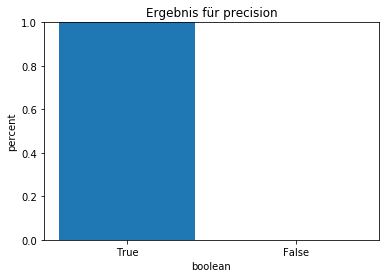

None


In [137]:
print(make_plot('precision'))

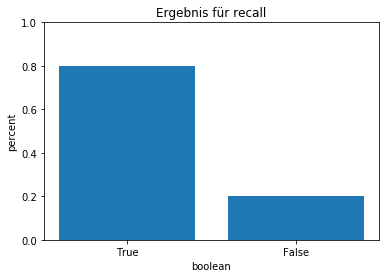

None


In [138]:
print(make_plot('recall'))

4 Diskussion

Um den Recall zu verbessern, wäre es beispielsweise möglich, alle in den Volltexten enthaltenen Emailadressen zu extrahieren.

Dann würde allerdings in einigen Fällen auch die Emailadresse des Verlags oder Herausgebers mit verzeichnet.

Möchte man alle Emailadressen finden, lohnt es sich insbesondere bei Elsevier, mehr als nur die erste Emailadresse zu extrahieren.

5 Fazit

Die Güte der Emailadressen-Extraktion ist insgesamt positiv zu beurteilen. Denn die Precision war optimal und der Recall gut.